In [1]:
import gym
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import walk
from td import td_on_policy_prediction

from RandomWalk import randomwalk
import n_step_TD as agent

Initialize Reference Implementation

In [2]:
env_ref = gym.make('RandomWalk-v0')
env_ref.seed(7)
policy_ref = np.ones([env_ref.observation_space.n, env_ref.action_space.n], dtype=float)
size_ref = env_ref.observation_space.n

In [3]:
env_my = randomwalk()
env_my.seed(7)

size_my = env_my.observation_space[1]

In [4]:
ns = [2, 4, 8]
alphas = np.linspace(0, 0.5, num=20)
rms10int0 = np.zeros([len(ns), len(alphas)])
rms10int1 = np.zeros([len(ns), len(alphas)])

In [5]:
v_star = np.arange(1, size_ref + 1) / (size_ref + 1)

In [6]:
for i, n in enumerate(ns):
    for j, alpha in enumerate(alphas):
        env_ref.seed(7)
        history0, actions_history = td_on_policy_prediction(env_ref, policy_ref, n=n, num_episodes=10, alpha=alpha, tderr=False, debug=False)

        rmsint0 = np.sqrt((history0 - v_star) ** 2).mean()
        rms10int0[i, j] = rmsint0

C:\Users\cafaya\.conda\envs\RLExercises\Lib\site-packages\gym\utils\passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
C:\Users\cafaya\.conda\envs\RLExercises\Lib\site-packages\gym\utils\passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
C:\Users\cafaya\.conda\envs\RLExercises\Lib\site-packages\gym\utils\passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'int'>`
  logger.warn(
C:\Users\cafaya\.conda\envs\RLExercises\Lib\site-packages\gym\utils\passive_env_checker.py:233: Depreca

In [7]:
for i in range(len(actions_history)):
    for j in range(len(actions_history[i])):
                   if actions_history[i][j] == 1:
                       actions_history[i][j] = 0
                   elif actions_history[i][j] == -1:
                       actions_history[i][j] = 1
#print(f"Actions: {actions_history}")

In [10]:
for i, n in enumerate(ns):
    for j, alpha in enumerate(alphas):

        env_my.seed(7)
        state_values_my = agent.initialize_state_values((env_my.observation_space[0],env_my.observation_space[1]))
        history1 = agent.n_step_td_estimating(env_my, state_values_my, episodes=10, n=n, alpha=alpha, actions=None, debug=False)

        rmsint1 = np.sqrt((history1 - v_star) ** 2).mean()
        rms10int1[i, j] = rmsint1

Episode: 1 Finished | Average Steps: 8.0
Episode: 2 Finished | Average Steps: 12.0
Episode: 3 Finished | Average Steps: 16.0
Episode: 4 Finished | Average Steps: 10.0
Episode: 5 Finished | Average Steps: 4.0
Episode: 6 Finished | Average Steps: 6.0
Episode: 7 Finished | Average Steps: 4.0
Episode: 8 Finished | Average Steps: 14.0
Episode: 9 Finished | Average Steps: 6.0
Episode: 10 Finished | Average Steps: 12.0
alpha: 0.0
Total number of episodes: 10
Total number of steps: 92
Total Average of Steps Per Episode: 9.2
Episode: 1 Finished | Average Steps: 8.0
Episode: 2 Finished | Average Steps: 12.0
Episode: 3 Finished | Average Steps: 16.0
Episode: 4 Finished | Average Steps: 10.0
Episode: 5 Finished | Average Steps: 4.0
Episode: 6 Finished | Average Steps: 6.0
Episode: 7 Finished | Average Steps: 4.0
Episode: 8 Finished | Average Steps: 14.0
Episode: 9 Finished | Average Steps: 6.0
Episode: 10 Finished | Average Steps: 12.0
alpha: 0.02631578947368421
Total number of episodes: 10
Total 

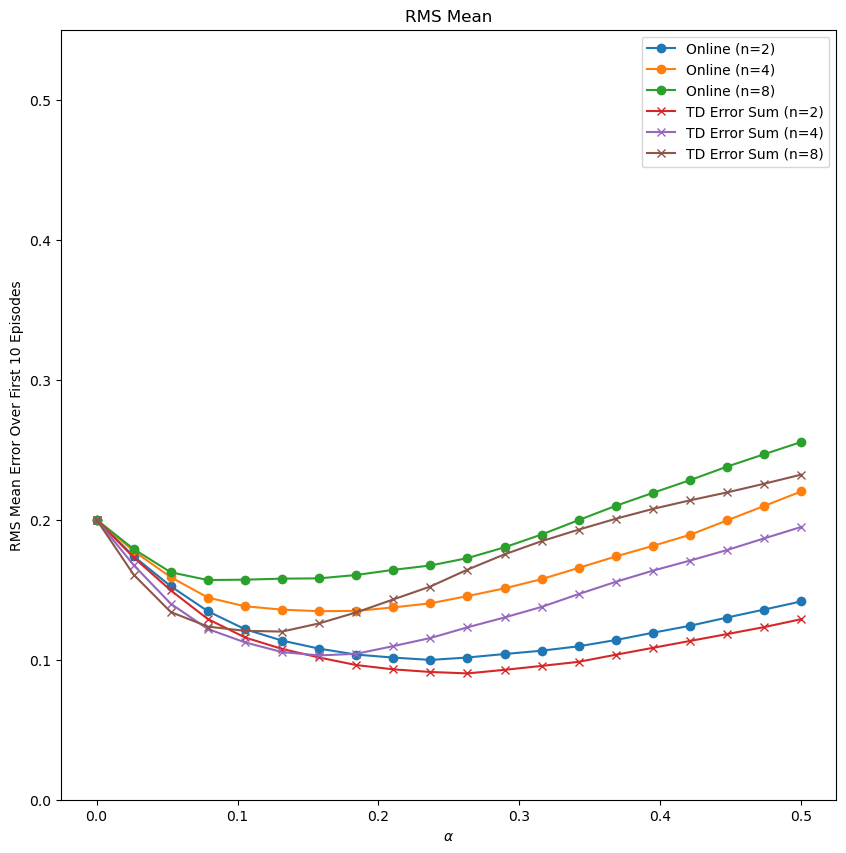

In [11]:
matplotlib.rcParams['figure.figsize'] = [10, 10]

plt.figure()
plt.title(f"RMS Mean")
plt.xlabel(r"$\alpha$"); plt.ylim([0, 0.55])
plt.ylabel("RMS Mean Error Over First 10 Episodes")
for i, n in enumerate(ns):
    plt.plot(alphas, rms10int0[i, :], 'o-', label=f'Online (n={n})')
for i, n in enumerate(ns):
    plt.plot(alphas, rms10int1[i, :], 'x-', label=f'TD Error Sum (n={n})')
plt.legend(loc=0)
plt.show()